In [34]:
import GetOldTweets3 as got
import string

In [35]:
def tweets():
    tweets_hastag = got.manager.TweetCriteria().setQuerySearch('Covid-19 in India').setSince("2020-06-10").setUntil("2020-07-10").setLang('en').setMaxTweets(1000)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweets_hastag)
    # Creating list of chosen tweet data
    tweets_text = [tweet.text for tweet in tweets]
    return ' '.join(tweets_text)
text=tweets()
print(text)

India's Covid-19 tally, fatality rate per million population lowest in world: Health ministry https://timesofindia.indiatimes.com/india/indias-covid-19-tally-fatality-rate-per-million-population-lowest-in-world-health-ministry/articleshow/76835387.cms via NaMo App #COVID__19 Total corona cases 10.07.20 in India and in last 24 Hours Confirmed. 7,94,842. ( 25,790 ) Active. 2,77,158 Recovered. 4,95,960. ( 19,407 ) Deceased. 21,623. ( 479 ) #coronakoharanahai Episode 77: Talking Covid-19 in India  43% of Covid-19 deaths in India in 30-59 yrs age band http://dlvr.it/RbJb4w Corona crisis: Union Health Minister Dr. Harsh Vardhan said – COVID-19 recovery rate in India is 62.08 percent, death rate is 2.75 percent less than the world  No community spread of Covid-19 in country: Govt | India News  @msisodia sir (1235 )schools already promoted students of 9th in India even Delhi also .but private schools didn't promote. It is very unfair with rest of students if they won't get promoted Sir please 

## TEXT PREPROCESSING

In [36]:
#Lower case text
lower_text=text.lower()
# print(lower_text)

In [37]:
#Remove punctuations
clean_text=lower_text.translate(str.maketrans('', '', string.punctuation))
# print(clean_text)

In [38]:
#Tokenizing word
tokenized_words=clean_text.split()
# print(tokenized_words)

In [39]:
#Removing stopwords
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
final_words=[word for word in tokenized_words if word not in stop_words]
# print(final_words)

## NLP EMOTION

In [40]:
emotion_list={}
with open('emotion.txt','r') as file:
    for line in file:
        clean_line=line.replace("\n","").replace("'","").replace(",","").strip()
        word,emotion=clean_line.split(":")
        
        if word in final_words:
            if emotion not in emotion_list:
                emotion_list[emotion]=1
            else:
                emotion_list[emotion]+=1
print(emotion_list)
total=sum(emotion_list.values())
for key in emotion_list.keys():
    emotion_list[key]=round((emotion_list[key]*100)/total,2)
print(emotion_list)

{' cheated': 1, ' attracted': 5, ' angry': 4, ' safe': 2, ' fearful': 6, ' fearless': 1, ' happy': 9, ' average': 2, ' adequate': 2, ' attached': 1, ' powerless': 4, ' hated': 1, ' focused': 2, ' sad': 7, ' free': 1, ' entitled': 1, ' alone': 1, ' singled out': 2, ' apathetic': 1, ' lost': 1, ' codependent': 1, ' esteemed': 2, ' surprise': 2, ' independent': 1, ' burdened': 1}
{' cheated': 1.64, ' attracted': 8.2, ' angry': 6.56, ' safe': 3.28, ' fearful': 9.84, ' fearless': 1.64, ' happy': 14.75, ' average': 3.28, ' adequate': 3.28, ' attached': 1.64, ' powerless': 6.56, ' hated': 1.64, ' focused': 3.28, ' sad': 11.48, ' free': 1.64, ' entitled': 1.64, ' alone': 1.64, ' singled out': 3.28, ' apathetic': 1.64, ' lost': 1.64, ' codependent': 1.64, ' esteemed': 3.28, ' surprise': 3.28, ' independent': 1.64, ' burdened': 1.64}


## VISUALIZATION

In [41]:
import matplotlib.pyplot as plt

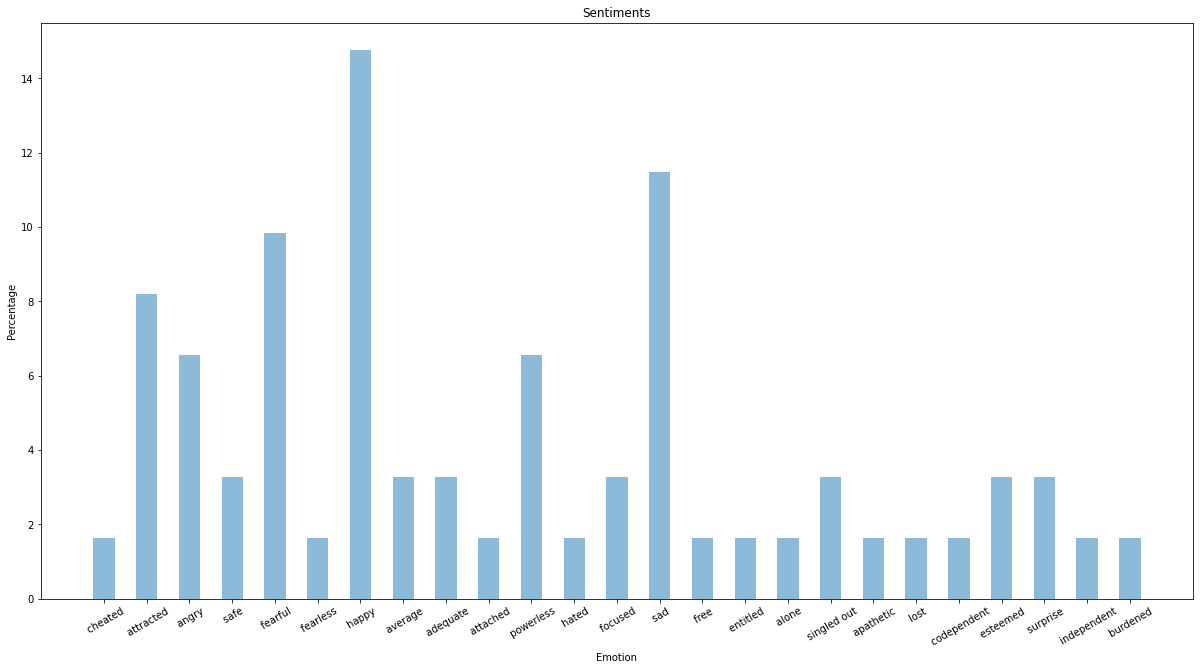

In [42]:
fig=plt.figure(figsize=(16,8))
axes=fig.add_axes([0,0,1,1])
axes.bar(emotion_list.keys(),emotion_list.values(),align='center',width=0.5,alpha=0.5)
axes.set_title('Sentiments')
axes.set_xlabel('Emotion')
axes.set_ylabel('Percentage')
plt.xticks(rotation=30)
plt.show()

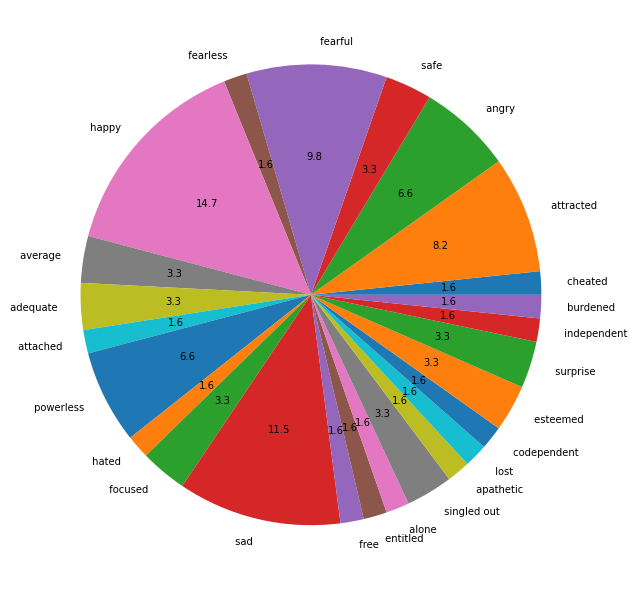

In [43]:
fig=plt.figure(figsize=(16,8))
axes=fig.add_axes([0,0,1,1])
axes.pie(emotion_list.values(),labels=emotion_list.keys(),autopct='%.1f')
plt.show()